#**Performing clustering and fitting within a Facebook Live sellers in Thailand, UCI ML Repo Dataset**

In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


##**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##**Loading Dataset**

Dataset Download Link: [https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Live.csv")
CData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Live.csv")

In [4]:
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


##**Descriptive Statistics**


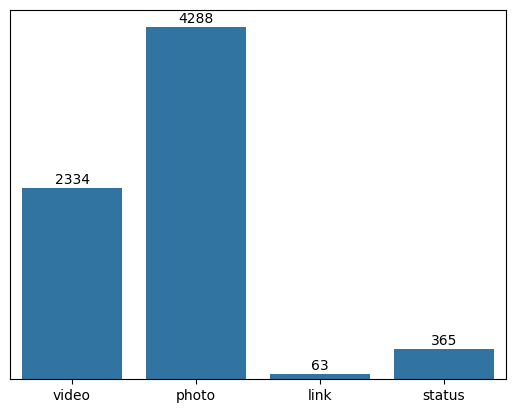

In [5]:
ax = sns.countplot(x='status_type', data=data)

# Add count labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 6),
                textcoords='offset points')

# Create custom legend labels
legend_labels = data['status_type'].unique()
legend_patches = [mpatches.Patch(color=sns.color_palette()[i], label=label) for i, label in enumerate(legend_labels)]

# Remove y-axis label and ticks
ax.set_yticklabels([])
ax.set_yticks([])
# Remove y-axis label count
ax.set_ylabel('')
ax.set_xlabel('')
# ax.set(xlabel="No.of Tweets")
# Show the plot
plt.show()

###**info()**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

###**describe()**

In [7]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


###**nunique()**

In [8]:
data.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

###**Check for missing values**

In [9]:
# Check for missing values
print(data.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


###**Drop columns "Column1,Column2,Column3,Column4"**

In [10]:
data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
CData.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [11]:
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


###**Drop columns "status_id, status_published"**

In [13]:
data.drop(['status_id', 'status_published'], axis=1, inplace=True)
CData.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


###**status_type unique values and count**

In [15]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [16]:
len(data['status_type'].unique())

4

In [17]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


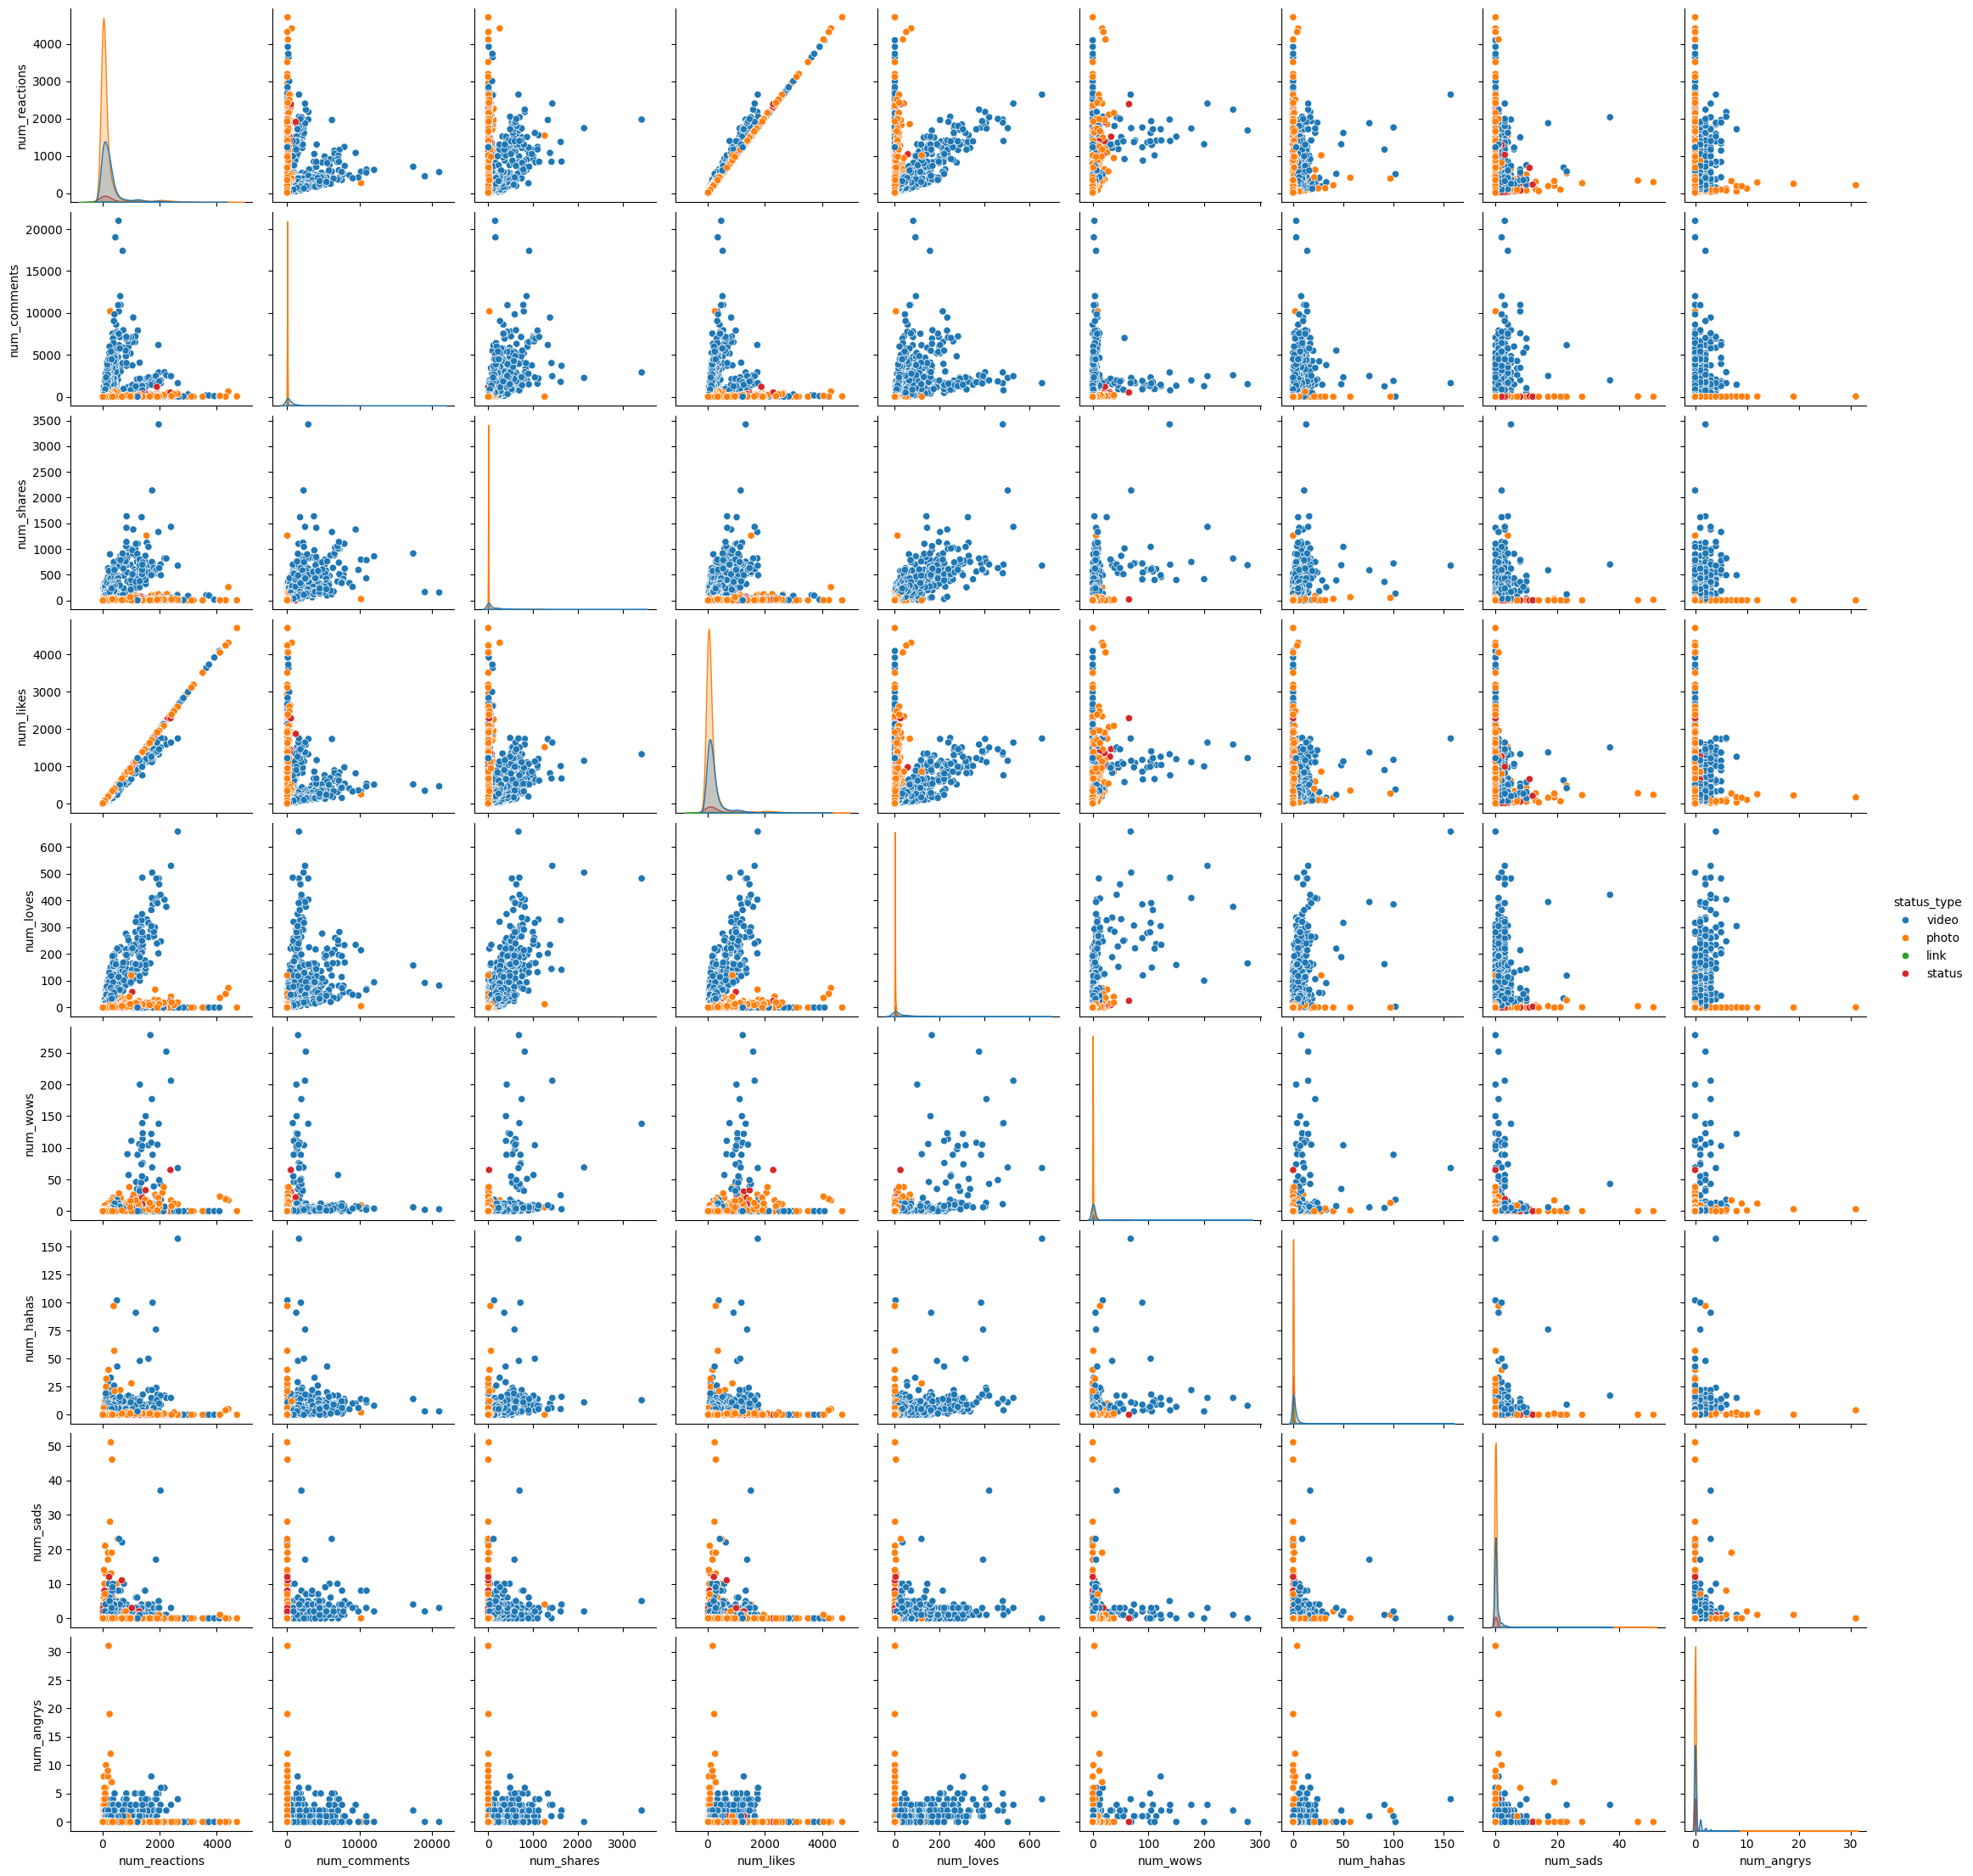

In [18]:
sns.pairplot(data,hue="status_type")

In [19]:
X = data
y = data['status_type']

In [20]:
X

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [21]:
y

0       video
1       photo
2       video
3       photo
4       photo
        ...  
7045    photo
7046    photo
7047    photo
7048    photo
7049    photo
Name: status_type, Length: 7050, dtype: object

##**Label Encoding**

In [22]:
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

###**After Label encodung status_type unique values and count**

In [23]:
data['status_type'].unique()

array([3, 1, 0, 2])

In [24]:
len(data['status_type'].unique())

4

In [25]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [26]:
cols = X.columns

###**Distribution of status_type**

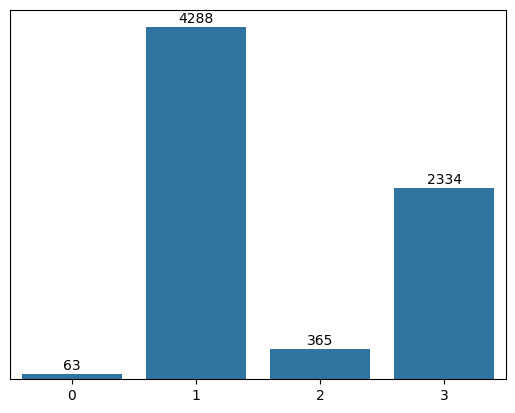

In [27]:
ax = sns.countplot(x='status_type', data=data)

# Add count labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 6),
                textcoords='offset points')

# Create custom legend labels
legend_labels = data['status_type'].unique()
legend_patches = [mpatches.Patch(color=sns.color_palette()[i], label=label) for i, label in enumerate(legend_labels)]

# Remove y-axis label and ticks
ax.set_yticklabels([])
ax.set_yticks([])
# Remove y-axis label count
ax.set_ylabel('')
ax.set_xlabel('')
# Show the plot
plt.show()

**Scaling the data**

In [28]:
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [29]:
X = pd.DataFrame(X, columns=[cols])

In [30]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


##**Kmeans**

**Optimal number of clusters using Elbow method**

In [31]:
# Determine optimal number of clusters using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)


899.1609334281561
237.75726404419646
161.5963340003362
127.31313212987737
96.24989550305182
82.47515136223942
73.25916430630365
66.62852853993797
61.1593131422594
57.31055742112511


In [32]:
wcss

[899.1609334281561,
 237.75726404419646,
 161.5963340003362,
 127.31313212987737,
 96.24989550305182,
 82.47515136223942,
 73.25916430630365,
 66.62852853993797,
 61.1593131422594,
 57.31055742112511]

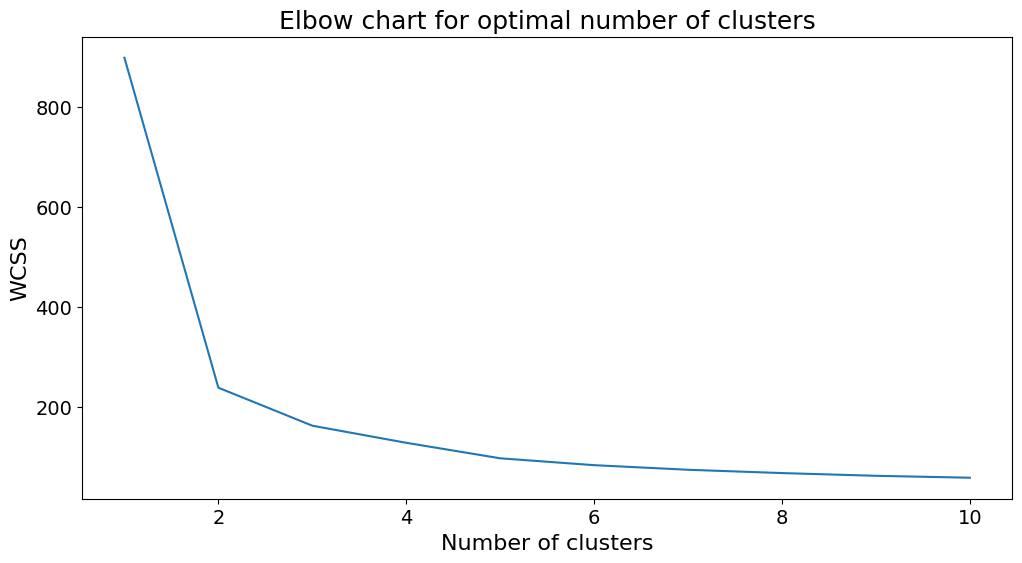

In [33]:
# Plot the Elbow method
plt.subplots(figsize=(12,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow chart for optimal number of clusters',fontsize=18)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


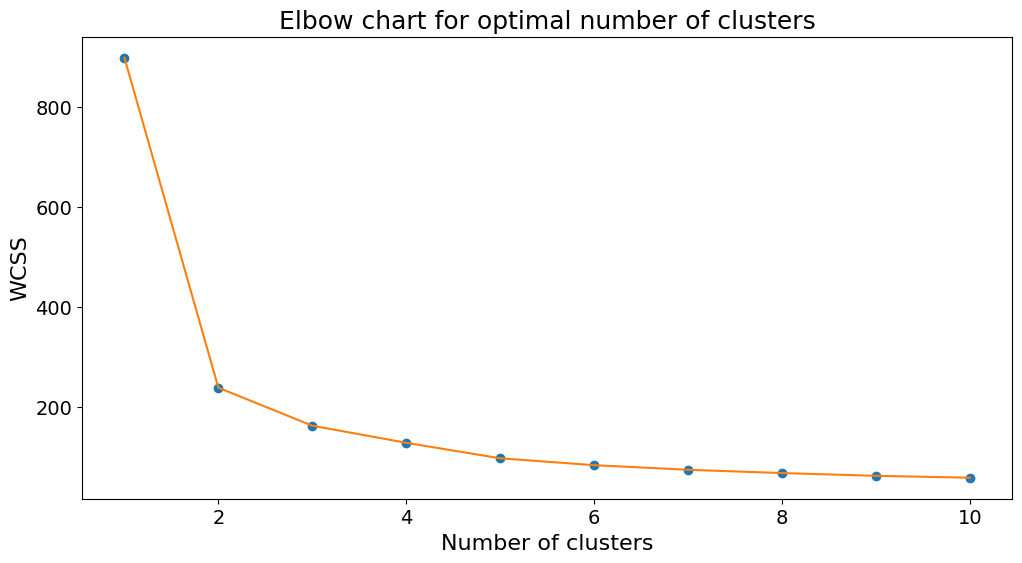

In [34]:
plt.subplots(figsize=(12,6))
plt.plot(np.arange(1,11), wcss, 'o') #align with no. of clusters
plt.plot(np.arange(1,11), wcss, '-')
plt.title('Elbow chart for optimal number of clusters',fontsize=18)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [35]:
def compare_clusters(X, y, cluster_range):
    """
    This function compares the clustering performance of KMeans over a range of cluster numbers.

    Parameters:
    X : The input samples to cluster.

    y : The true labels for the input samples.

    cluster_range : The range of cluster numbers to evaluate.

    Returns:
    None
    """
    accuracy_scores = []

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_

        # Note: Accuracy might not be a suitable metric for unsupervised learning
        # but we'll use it as per the original code
        correct_labels = sum(y == labels)
        accuracy = correct_labels / float(y.size)
        accuracy_scores.append(accuracy)

        print("Number of clusters:", n_clusters)
        print("Correctly Labeled Samples:", correct_labels, "out of", y.size)
        print('Accuracy score: {0:0.2f}'. format(accuracy))
        accuracy = (correct_labels / float(y.size)) * 100
        print('Accuracy score: {0:.0f}%'.format(accuracy))

    # Convert accuracy scores to percentages
    accuracy_scores_percentage = [score * 100 for score in accuracy_scores]

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(cluster_range, accuracy_scores_percentage, marker='o')
    plt.title('Accuracy Scores for Different Numbers of Clusters', fontsize=18)
    plt.xlabel('Number of Clusters', fontsize=16)
    plt.ylabel('Accuracy Score (%)', fontsize=16)
    plt.xticks(cluster_range, fontsize=14)  # Ensure x-axis values are integers
    plt.yticks(fontsize=14)
    plt.show()

Number of clusters: 2
Correctly Labeled Samples: 63 out of 7050
Accuracy score: 0.01
Accuracy score: 1%
Number of clusters: 3
Correctly Labeled Samples: 138 out of 7050
Accuracy score: 0.02
Accuracy score: 2%
Number of clusters: 4
Correctly Labeled Samples: 4340 out of 7050
Accuracy score: 0.62
Accuracy score: 62%
Number of clusters: 5
Correctly Labeled Samples: 82 out of 7050
Accuracy score: 0.01
Accuracy score: 1%


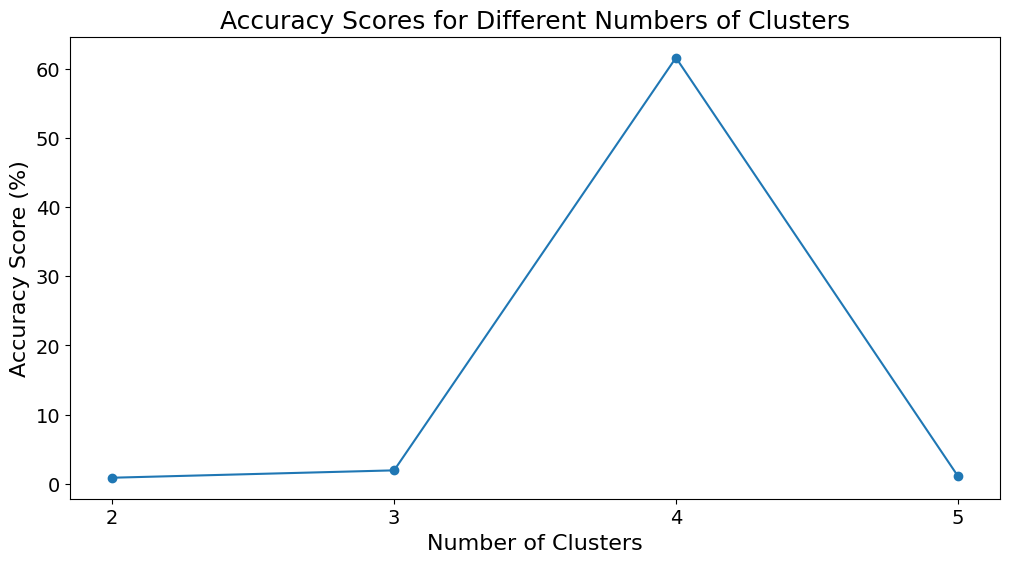

In [36]:
compare_clusters(X, y, range(2, 6))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

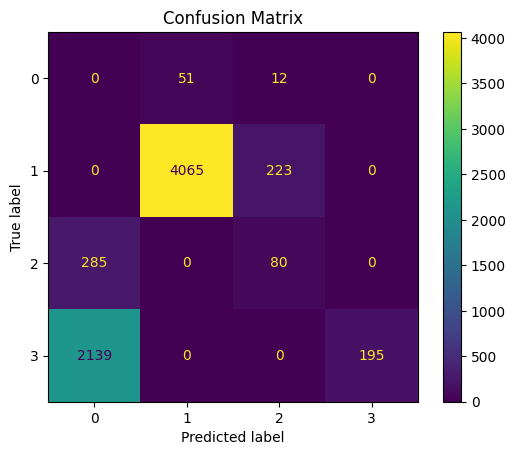

In [37]:
def plot_confusion_matrix(y, labels):
    """
    This function plots the confusion matrix for given true labels and predicted labels.

    Parameters:
    y : The true labels for the input samples.

    labels : The predicted labels for the input samples.

    Returns:
    None
    """
    cm = confusion_matrix(y, labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure(figsize=(12, 6))
    disp.plot(cmap='viridis')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

plot_confusion_matrix(y, labels)


In [39]:
llabel=pd.Series(labels)
llabel.unique()

array([0, 1, 3, 2], dtype=int32)

In [40]:
CData['Clusters']=labels

In [41]:
CData

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Clusters
0,video,529,512,262,432,92,3,1,1,0,0
1,photo,150,0,0,150,0,0,0,0,0,1
2,video,227,236,57,204,21,1,1,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,1
4,photo,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,1
7046,photo,16,0,0,14,1,0,1,0,0,1
7047,photo,2,0,0,1,1,0,0,0,0,1
7048,photo,351,12,22,349,2,0,0,0,0,1


In [42]:
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [43]:
CData

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Clusters
0,video,529,512,262,432,92,3,1,1,0,0
1,photo,150,0,0,150,0,0,0,0,0,1
2,video,227,236,57,204,21,1,1,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,1
4,photo,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,1
7046,photo,16,0,0,14,1,0,1,0,0,1
7047,photo,2,0,0,1,1,0,0,0,0,1
7048,photo,351,12,22,349,2,0,0,0,0,1


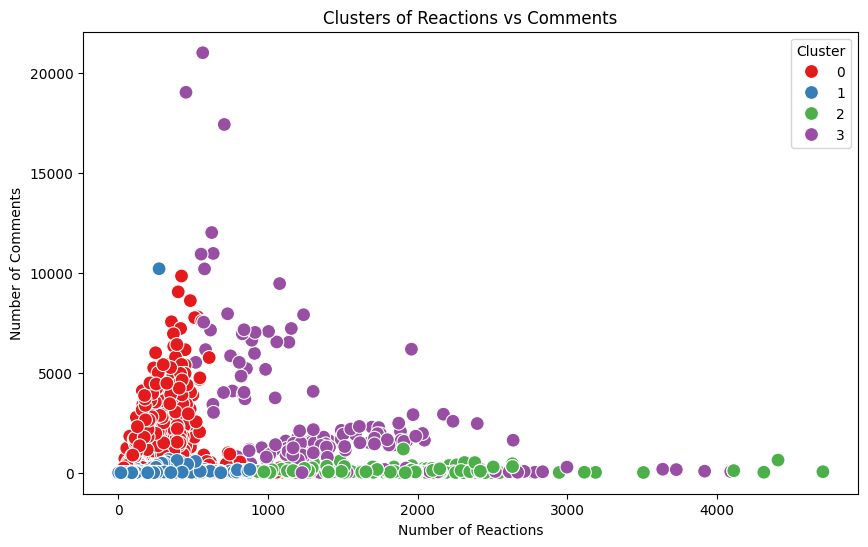

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=CData, x='num_reactions', y='num_comments', hue='Clusters', palette='Set1', s=100)
plt.title('Clusters of Reactions vs Comments')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.legend(title='Cluster')
plt.show()


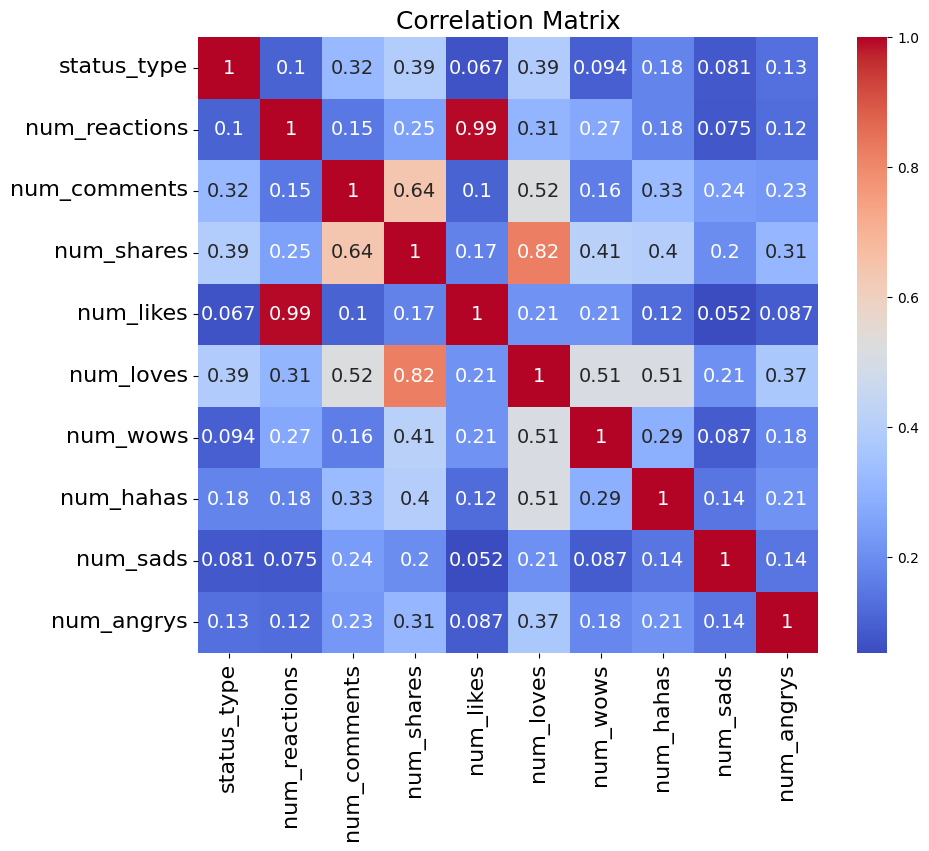

In [46]:
# Selecting numeric columns only
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 14})
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
plt.show()

In [47]:
CData[CData['status_type']=='video']['Clusters'].value_counts()

Clusters
0    2139
3     195
Name: count, dtype: int64

In [48]:
CData[CData['status_type']=='photo']['Clusters'].value_counts()

Clusters
1    4065
2     223
Name: count, dtype: int64

In [49]:
CData[CData['status_type']=='link']['Clusters'].value_counts()

Clusters
1    51
2    12
Name: count, dtype: int64

In [50]:
CData[CData['status_type']=='status']['Clusters'].value_counts()

Clusters
0    285
2     80
Name: count, dtype: int64

<ipython-input-51-b93d7cb0a8e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=CData, x='status_type', y='Clusters', inner='quartile', palette='Set1')


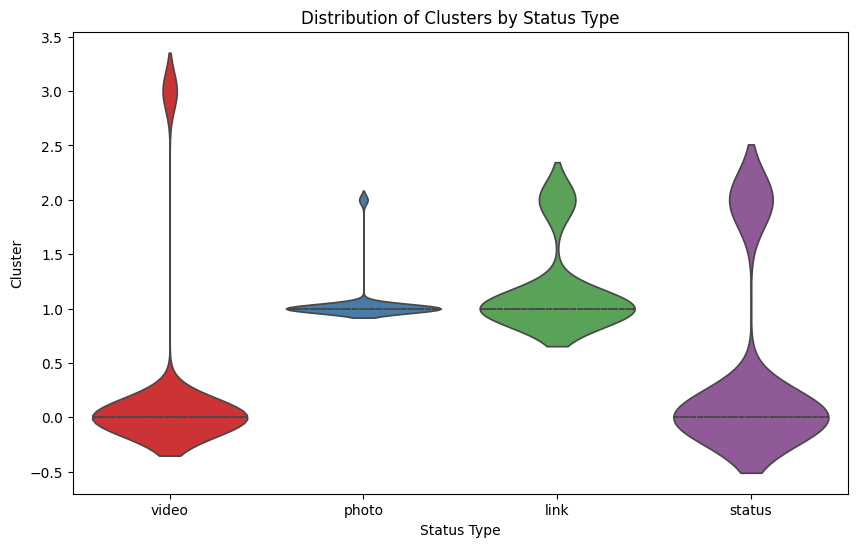

In [51]:
# Plot violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=CData, x='status_type', y='Clusters', inner='quartile', palette='Set1')
plt.title('Distribution of Clusters by Status Type')
plt.xlabel('Status Type')
plt.ylabel('Cluster')
plt.show()

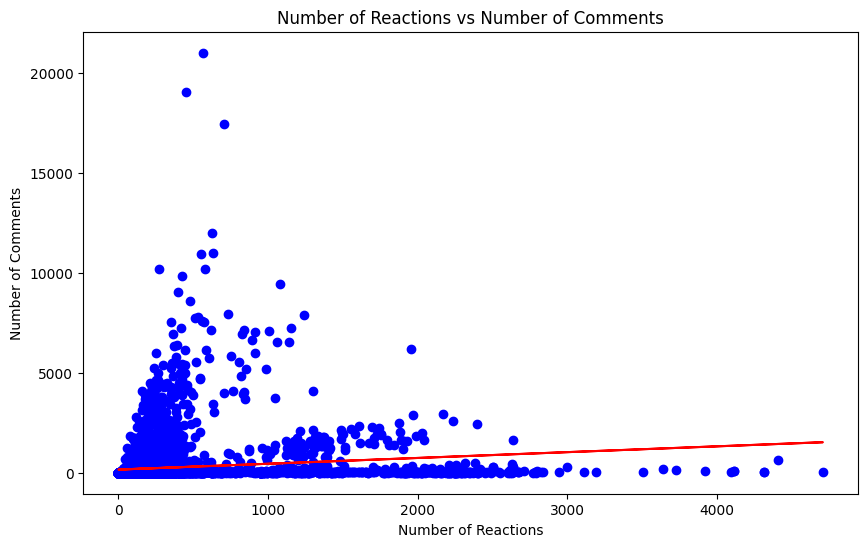

In [52]:
# Line fitting
def line_fitting(X):
    """
    This function fits a line to the data points of 'num_reactions' vs 'num_comments'
    and plots both the scatter plot and the fitted line.

    Parameters:
    X : The input DataFrame containing 'num_reactions' and 'num_comments' columns.

    Returns:
    None
    """
    # Check if the required columns are present
    if 'num_reactions' in X.columns and 'num_comments' in X.columns:
        plt.figure(figsize=(10,6))
        plt.scatter(X['num_reactions'], X['num_comments'], color='blue')
        plt.title('Number of Reactions vs Number of Comments')
        plt.xlabel('Number of Reactions')
        plt.ylabel('Number of Comments')

        # Fitting a line
        m, b = np.polyfit(X['num_reactions'], X['num_comments'], 1)
        plt.plot(X['num_reactions'], m * X['num_reactions'] + b, color='red')
        plt.show()
    else:
        print("The required columns are not present in the dataset.")

line_fitting(data)